In [1]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np
import struct
from array import array
import os

# Pré-Processamento

## Leitura dos dados

In [2]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)   

input_path = './data'
training_images_filepath = os.path.join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = os.path.join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = os.path.join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = os.path.join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#reduzindo o número de exemplos
#x_train, y_train = x_train[:5000], y_train[:5000]
#x_test, y_test = x_test[:2000], y_test[:2000]

#normalização
x_train = np.array(x_train).reshape(-1,784).astype('float32') / 255.0
x_test =  np.array(x_test).reshape(-1,784).astype('float32') / 255.0

print(x_train.shape[0], 'Training samples')
print(x_test.shape[0], 'Test samples')

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

60000 Training samples
10000 Test samples


In [3]:
def one_hot(true_labels,num_classes): 
    labels = keras.utils.to_categorical(true_labels, num_classes)
    return labels

y_train_one_hot = one_hot(y_train, 10)
y_test_one_hot = one_hot(y_test, 10)


# MPL

In [4]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(784,)))
model.add(Dense(units=40, activation='tanh'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax')) #10 classes

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 40)                440       
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8810 (34.41 KB)
Trainable params: 8810 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(optimizer="sgd", loss='categorical_crossentropy',  metrics=['accuracy'])

model_fit = model.fit(x=x_train, y=y_train_one_hot, epochs=30, verbose=1, validation_data=(x_test, y_test_one_hot))

score = model.evaluate(x_test, y_test_one_hot, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3920 - accuracy: 0.4825 - val_loss: 0.7799 - val_accuracy: 0.7376
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7138 - accuracy: 0.7710 - val_loss: 0.4606 - val_accuracy: 0.8644
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5396 - accuracy: 0.8367 - val_loss: 0.3844 - val_accuracy: 0.8845
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4682 - accuracy: 0.8612 - val_loss: 0.3634 - val_accuracy: 0.8877
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4219 - accuracy: 0.8790 - val_loss: 0.3118 - val_accuracy: 0.9071
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3882 - accuracy: 0.8880 - val_loss: 0.2939 - val_accuracy: 0.9110
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3639 - accuracy: 0.8954 - val_loss: 0.2782 - val_accuracy:

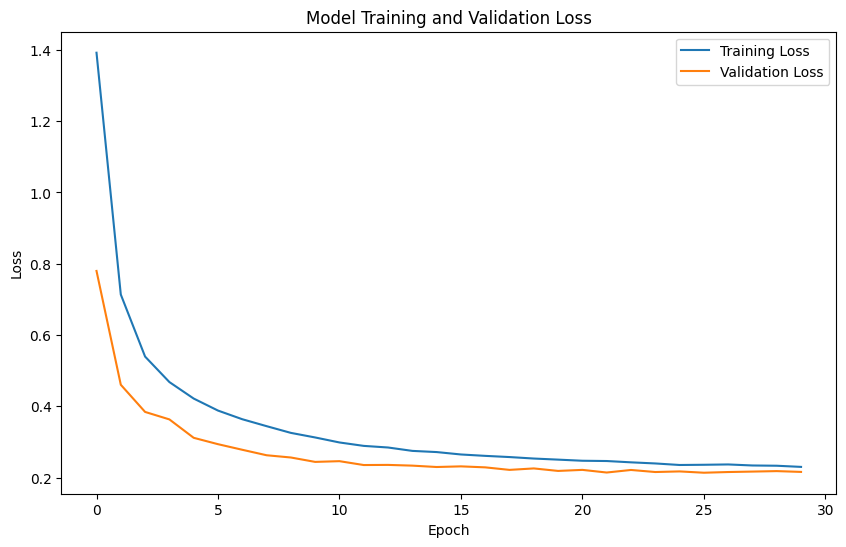

In [6]:
plt.figure(figsize=(10,6))
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# Matriz de Confusão

313/313 [==============================] - 0s 793us/step


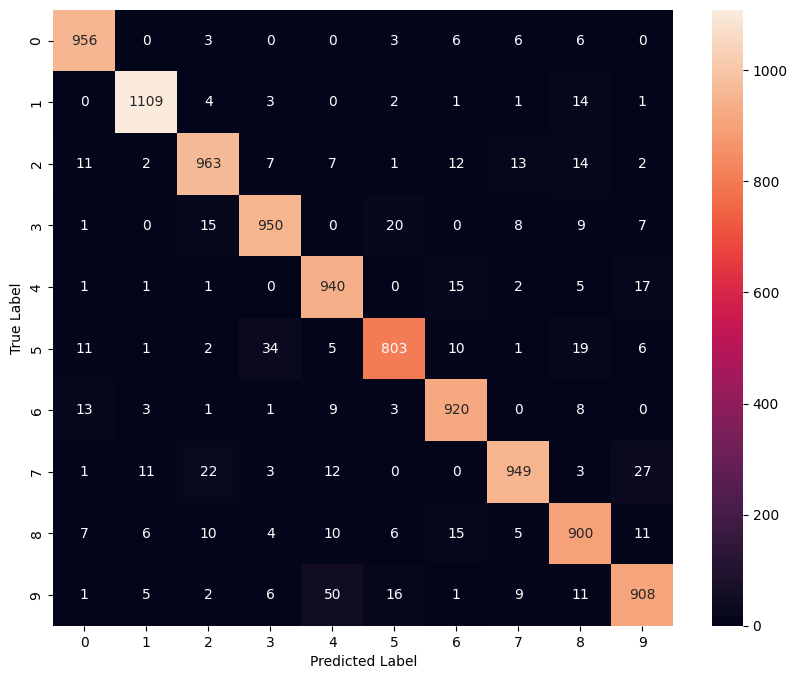

In [7]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true = np.argmax(y_test_one_hot, axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# CNN

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from keras.datasets import mnist

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(7*7*64, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)  # 10 classes

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(x.size(0), -1)  #converte em vetor para a camada densa
        x = self.dropout(self.fc1(x))
        x = self.fc2(x)
        return x

In [9]:
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#reduzindo o número de exemplos
#x_train, y_train = x_train[:5000], y_train[:5000]
#x_test, y_test = x_test[:2000], y_test[:2000]

#converte pra array e normaliza
x_train = np.array(x_train).reshape(-1, 1, 28, 28).astype('float32') / 255
x_test = np.array(x_test).reshape(-1, 1, 28, 28).astype('float32') / 255

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

#converte pra tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_test = torch.from_numpy(x_test)
y_test = torch.from_numpy(y_test)

#separa em batches e cria os datasets de treino e teste
train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)

#cria os dataloaders de treino e teste
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


In [10]:
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(30):
    model.train()
    train_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))

    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(test_loader))
    val_accuracies.append(100 * correct / total)


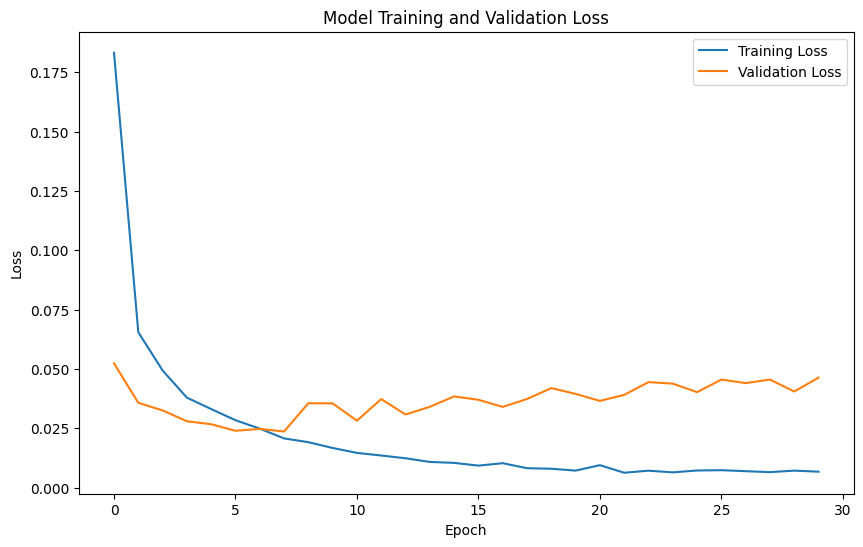

In [13]:
plt.figure(figsize=(10,6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# Matriz de Confusão

Accuracy: 99.22 %


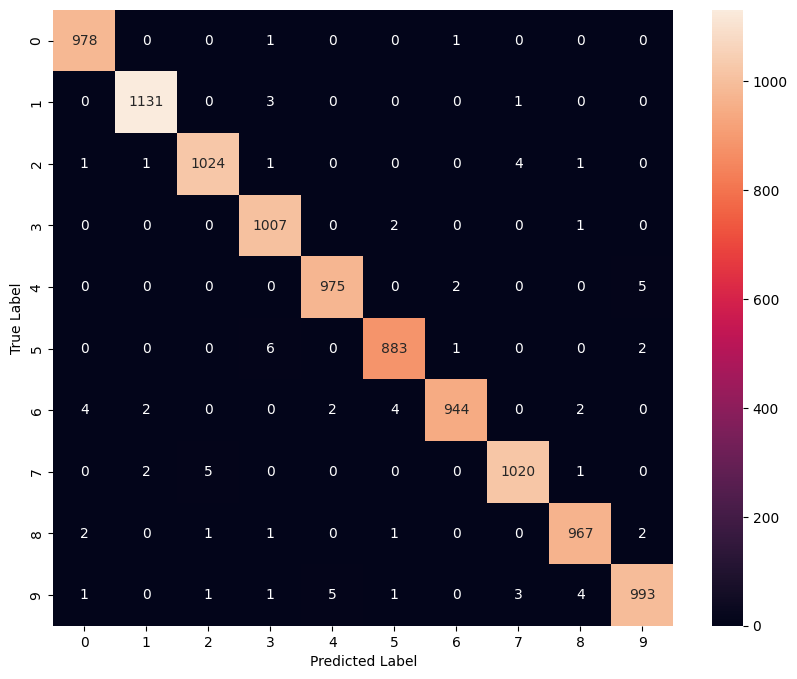

In [12]:
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

print('Accuracy: {} %'.format(100 * correct / total))
confusion_mtx = confusion_matrix(y_true, y_pred) 


plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()